# Curso Deep Learning 360 

<img src="https://i.ibb.co/P1BsHJB/Logo-Datos-Vivos.png" width="300px">

Creado por [Pablo Casas](https://twitter.com/pabloc_ds) | [Escuela de Datos Vivos](https://escueladedatosvivos.ai/)




### Visión por computadora con MNIST

Objetivo:

- Entender la vectorización de una matriz (flatten)
- Evaluación del modelo de Keras
- Predicción de casos nuevos


### 1) Carga de datos

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

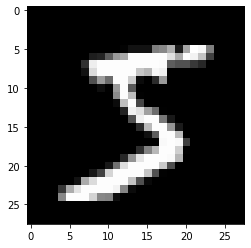

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray', interpolation='none')

In [ ]:
x_train[0].shape
x_train[0]

In [ ]:
y_train[0]

5

### 2) Creación del modelo

In [ ]:
from keras import Sequential
from keras.layers import Dense, Flatten

model = keras.Sequential([
    Flatten(input_shape=(28, 28)), # <-- Importante!
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(784*128 + 128) + (128*10 + 10)

101770

In [ ]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy', # usada para multi-class
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 3.6808 - accuracy: 0.8670 - val_loss: 0.6800 - val_accuracy: 0.9008
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.5027 - accuracy: 0.9040 - val_loss: 0.4303 - val_accuracy: 0.9101
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3061 - accuracy: 0.9275 - val_loss: 0.3834 - val_accuracy: 0.9281
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2319 - accuracy: 0.9433 - val_loss: 0.3361 - val_accuracy: 0.9372
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2138 - accuracy: 0.9465 - val_loss: 0.3186 - val_accuracy: 0.9348
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1787 - accuracy: 0.9526 - val_loss: 0.2895 - val_accuracy: 0.9408
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1711 - accuracy: 0.9551 - val_loss: 0.2852 - val_accuracy: 0.9433
Epoch 

### 3) Evaluación de la performance del modelo

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=64) # PRREGUNTA: ¿Por qué tiene batch size?

157/157 [==============================] - 0s 1ms/step - loss: 0.3660 - accuracy: 0.9555


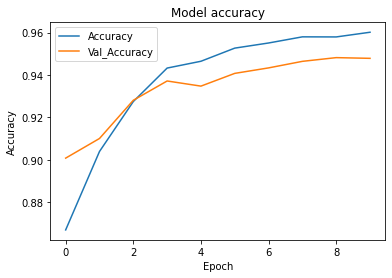

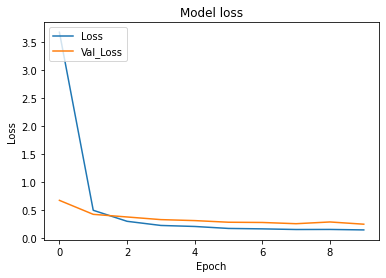

In [ ]:
# Lo mas standard para visualizar resultados:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()


### 4) Predicción de casos nuevos

Obtenemos 1 registros del test:

In [ ]:
x_test[:1]

In [ ]:
pred = model.predict(x_test[:1])

pred

array([[2.0405677e-27, 6.6678610e-26, 1.3452566e-12, 9.8762962e-09,
        8.8866564e-31, 4.8304474e-24, 0.0000000e+00, 1.0000000e+00,
        7.6502523e-26, 1.7319453e-20]], dtype=float32)

¿Cómo es el shape?

In [ ]:
pred.shape

(1, 10)

In [ ]:
import numpy as np
np.argmax(pred, 1)

array([7])

In [ ]:
y_test[:1]

array([7], dtype=uint8)

### Ejercicios!

Al igual que con MNIST, acá tienen que predecir 10 clases, que son prendas de indumentaria.

In [ ]:
(x_train, y_train), (x_test, y_test)=keras.datasets.fashion_mnist.load_data()

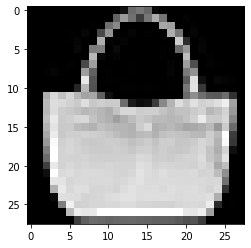

In [ ]:
plt.imshow(x_train[100], cmap='gray', interpolation='none')